
# **MIS710 Lab 4 - Introduction to Logistic Regression**

**Author: Associate Professor Lemai Nguyen**

Objective: To learn ML using decision trees for classification and estimatatiom, and gain practical skills to develop decision tree models and evaluate their performances


**Import Libraries and Functions**

Read about Logistic Regression at:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Train Test Split:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

Classification metrics:
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

# **Task 1: Breast Cancer Diagnosis**

**Breast Cancer Diagnosis**
Predict the diagnosis (healthy or cancerous) based on a biopsy dataset.

**Context**: The dataset was adapted from a biospy dataset. The dataset contains five (5) biological variables and the target variable.

**Data**:
V1, V2, V7-V9: biological variables

Diagnosis: healthy or cancerous

**Source**: adapted from a dataset provided by Dr Mark Griffin, Industry Fellow, University of Queensland; also available at: https://www.kaggle.com/datasets/ukveteran/biopsy-data-on-breast-cancer-patients

## **1.1 Import libraries and functions**

In [118]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

In [119]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.io.parsers.readers import annotations

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifi

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation

#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

## **1.2 Load data**

In [120]:
url='https://raw.githubusercontent.com/VanLan0/MIS710-ML/main/Datasets/biopsy_ln.csv'

In [121]:
# load dataset
records = pd.read_csv('https://raw.githubusercontent.com/VanLan0/MIS710-ML/main/Datasets/biopsy_ln.csv')


## **1.3 Inspect and pre-process data**

In [122]:
#Write your own code to explore the dataset, using print(records)


In [123]:
#Write your code examine shape and data types, using info()


### **Inspect missing data**

In [124]:
#Inspect missing data
records.isnull().sum()

ID           0
V1           0
V2           0
V7           0
V8           0
V9           0
diagnosis    0
dtype: int64

In [125]:
#drop irrelevant variables
records=records.drop(['ID'], axis=1)

## **1.4 Conduct Exploratory Data Analysis (EDA)**
1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

Note:
> Numeric variables
*   Summarise data through mean, median (Q2), Q1, Q3, range, Interquartile Range (IQR), outliers, standard deviation, and variance.
*   Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots of continuous variables.

> Categorical variables
*   Summarise data through mode(s), counts and percentages of unique categories.
*   Explore bar charts, pie charts, or frequency tables of categorical variables.

> Explore relationships between two or more variables  
*   Compare two continuous variables using their descriptive statistics (such as means, medians, and Inter Quartile Range (IQR), range) and explore the relationship between them using scatterplots and correlation coefficients.
*   Explore the relationship between two categorical variables using a two-way contingency table (crosstab), clustered bar charts, stacked bar charts or a mosaic plot.
*   Explore the relationship between one numeric and one categorical variable, through using and grouped boxplots, violin plots, and histograms.
*   Explore correlations among multiple (selected) numeric variables using heatmaps of the correlation matrix.


Note: You can also explore logistic regression relationships between two variables. Convert data as needed

In [ ]:
#create histograms
for i in records.iloc[:,:6]:
    sns.histplot(records[i], kde=True)
    plt.title(i)
    plt.show()

In [ ]:
#create barchats
plot=sns.countplot(data=records, x='diagnosis')
plt.show()

In [ ]:
#create histograms
for i in records.iloc[:,:5]:
    sns.kdeplot(data=records, x=records[i], hue= 'diagnosis', legend=True)
    plt.title(i)
    plt.show()

In [ ]:
sns.heatmap(data=records.corr(), cmap="Blues", annot=True)

## **1.5 Convert categorical data to numeric**
Define your own function and call it

In [ ]:
#convert categorical data to numerical
def coding_diagnosis(x):
        if x=='cancerous': return 1
        if x=='healthy': return 0

records['diagnosis'] = records['diagnosis'].apply(coding_diagnosis)

print(records.sample(10))

In [ ]:
records.info()

## **1.6 Select Features and Target**

Select predictors (attributes) for Classification

Set role (Target)

In [132]:
#Selecting predictors and label
features = records.columns[0:5]
X=records[features]  #Input data
y=records['diagnosis'] # Target variable

## **1.7 Split the Dataset**

Split arrays or matrices into random train and test subsets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)  # 80% training and 20% testing

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape[0])
print('Test dataset size:',X_test.shape[0])


## **1.8 Train a Logistic Regression Model and Make Predictions**

(Model implementation)

1.  Initialise /create an empty object decisiontreeclassifier (model)
2.  Train the model using the training dataset
3.  Make prediction using the model for the test dataset


Read about DecisionTreeClassifier at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html



In [134]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) #default criterion is gini, max_depth=25

In [135]:
# Train Decision Tree Classifer with the traning dataset
clf = clf.fit(X_train, y_train)


In [136]:
#Make predictions for the test dataset
y_pred = clf.predict(X_test)


**Inspect Predictions**

This is for learning purposes, so you can feel what predictions look like.

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.sample(20)

## **1.9 Evaluate Model Performance**


(Performance Evaluation)


1. Generate confusion matrix and classification report   
2. Calculate Accuracy, Precision, Recall, F1 separately when needed


Classification metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics







In [ ]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
#Model Evaluation, calculate metrics: Accuracy, Precision, Recall, F1,
print("Accuracy: ", '%.3f' % metrics.accuracy_score(y_test,y_pred))
print("Precision: ",'%.3f' % metrics.precision_score(y_test,y_pred))
print("Recall: ", '%.3f' % metrics.recall_score(y_test,y_pred))
print("F1: ", '%.3f' % metrics.f1_score(y_test,y_pred))


### **Plot ROC (Receiver operating characteristic) curve and confusion matrix**

ROC surve
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html?highlight=plot_roc_curve#sklearn.metrics.plot_roc_curve

Confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix

In [ ]:
#get predicted probabilities for the main class
y_pred_probs = clf.predict_proba(X_test)
y_pred_probs = y_pred_probs[:, 1]
y_pred_probs

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_probs)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## **1.10 Visualise the trees**

Not all classification machine learning models can be visualised.

### **Option 1: Extract rules and visualise the model**

In [142]:
#Import plot_tree to  extract rules and visualise the decition tree model
from sklearn.tree import plot_tree, export_text
from pandas.io.parsers.readers import annotations


In [ ]:
# Convert feature_names to a list if it's an Index object
feature_names = list(features) if isinstance(features, pd.Index) else features

# Extract the decision rules
rules = export_text(clf, feature_names=feature_names)
print(rules)

In [ ]:
# visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

**Discuss the Interpretability vs Explainability of the model**

Interpretability relates to understanding how a machine learning model works, i.e., how it makes predictions based on input data.

Explainability focuses on whether the model's decision-making process makes sense from a human perspective.

An explainable model not only provides predictions but also provides human-understandable explanations or justifications for those predictions.

Observe the rules and discuss Explainable AI

### **Option 2: Use pydotplus**

In [145]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

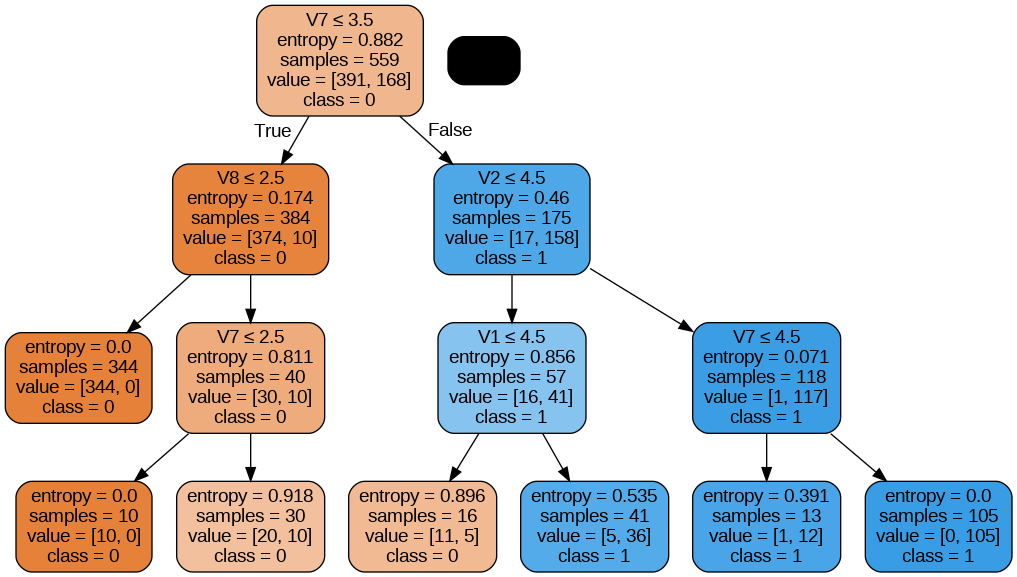

In [146]:
#Import libraries and classes
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Biopsy.png')
Image(graph.create_png())

# **Task 2: Titanic**
Dataset: Titanic

Source: https://www.kaggle.com/c/titanic

## **2.1 Import libraries and functions**

In [147]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.parsers.readers import annotations

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation

#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

## **2.2 Load data**

In [148]:
url='https://raw.githubusercontent.com/VanLan0/MIS710-ML/main/Datasets/titanic_train.csv'
# load dataset
records = pd.read_csv(url)

## **2.3 Inspect and pre-process data**

In [149]:
records.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,NaN,S


In [150]:
#Write your own code to examine the shape, variables and data types, hint: use info()

In [151]:
#drop irrelevant variables
records=records.drop(['PassengerId','Cabin','Name','Ticket'], axis=1)

In [152]:
records

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7,S
1,1,1,female,38,1,0,71,C
2,1,3,female,26,0,0,8,S
3,1,1,female,35,1,0,53,S
4,0,3,male,35,0,0,8,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13,S
887,1,1,female,19,0,0,30,S
888,0,3,female,NaN,1,2,23,S
889,1,1,male,26,0,0,30,C


### **Inspect missing data**

In [153]:
#Write your code to check missing data, Hint: use .isnull().sum()


In [154]:
#Fill in missing numerical data with mean and categorical data with mode
records['Age'].fillna(records['Age'].median(),inplace=True)
records['Embarked'].fillna(records['Embarked'].mode()[0], inplace=True) #there can be more than one mode

## **2.4 Conduct Exploratory Data Analysis (EDA)**
1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

Note:
> Numeric variables
*   Summarise data through mean, median (Q2), Q1, Q3, range, Interquartile Range (IQR), outliers, standard deviation, and variance.
*   Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots of continuous variables.

> Categorical variables
*   Summarise data through mode(s), counts and percentages of unique categories.
*   Explore bar charts, pie charts, or frequency tables of categorical variables.

> Explore relationships between two or more variables  
*   Compare two continuous variables using their descriptive statistics (such as means, medians, and Inter Quartile Range (IQR), range) and explore the relationship between them using scatterplots and correlation coefficients.
*   Explore the relationship between two categorical variables using a two-way contingency table (crosstab), clustered bar charts, stacked bar charts or a mosaic plot.
*   Explore the relationship between one numeric and one categorical variable, through using and grouped boxplots, violin plots, and histograms.
*   Explore correlations among multiple (selected) numeric variables using heatmaps of the correlation matrix.


3. Convert data as needed
You can also explore logistic regression relationships between two variables.

In [155]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [156]:
records.Age.describe()

count   891
mean     29
std      13
min       0
25%      22
50%      28
75%      35
max      80
Name: Age, dtype: float64

<Axes: xlabel='Age'>

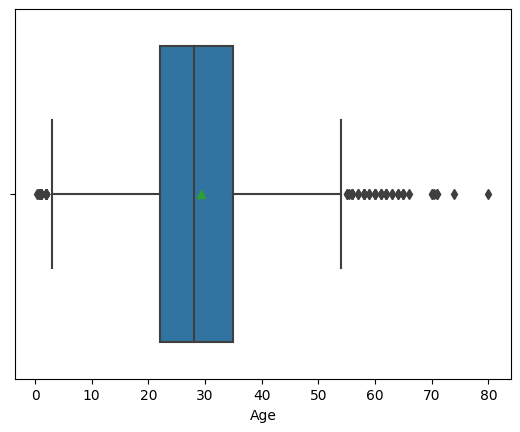

In [157]:
sns.boxplot(data=records, x='Age', showmeans=True)

In [41]:
#Write code to view descriptive stats for Fare, see how it was done for Age above

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare'>

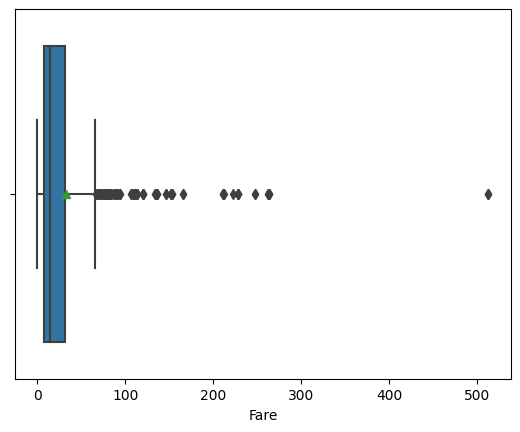

In [158]:
#Write code to create a boxplot for Fare, see how it was done for Age above


**Explore the target variable**

In [159]:
records.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

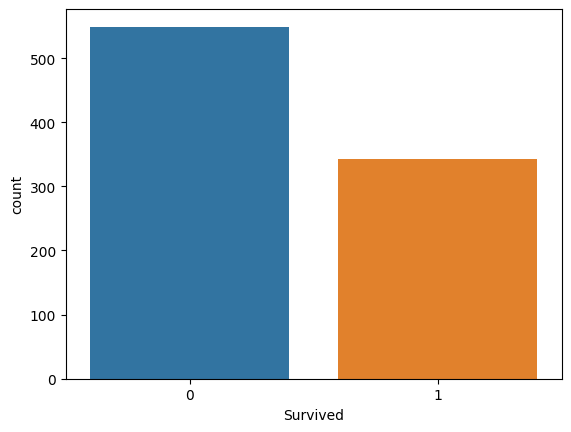

In [43]:
sns.countplot(data=records, x='Survived')

Do it yourself for other categorical variables

In [161]:
#Do it yourself for Embarked


S    646
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

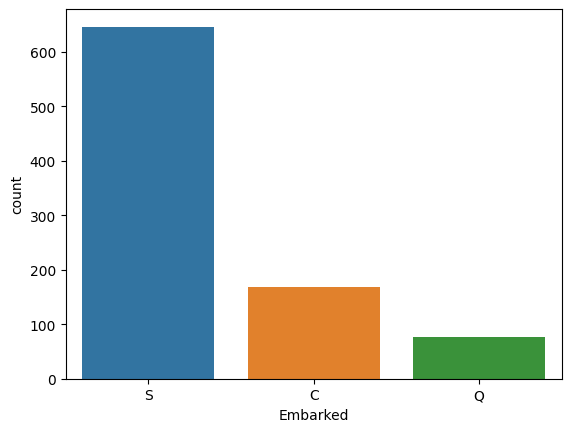

In [163]:
#Do it yourself for Embarked


In [46]:
cat_columns=['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex','Embarked']

Value counts for column 'Survived':
0    549
1    342
Name: Survived, dtype: int64



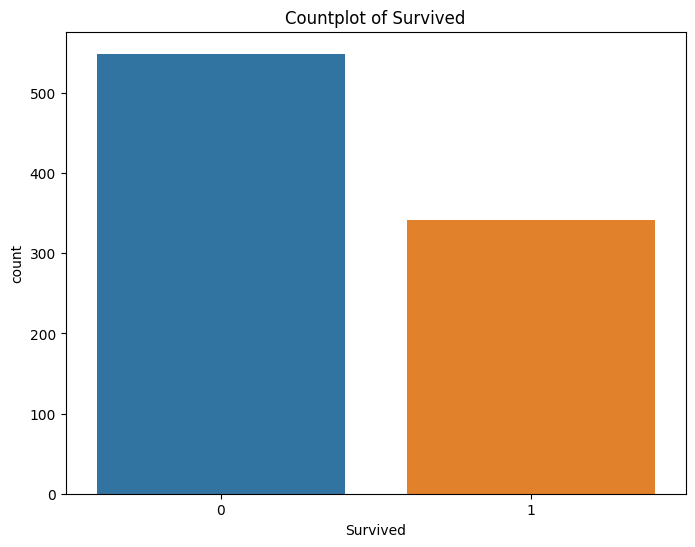

Value counts for column 'Pclass':
3    491
1    216
2    184
Name: Pclass, dtype: int64



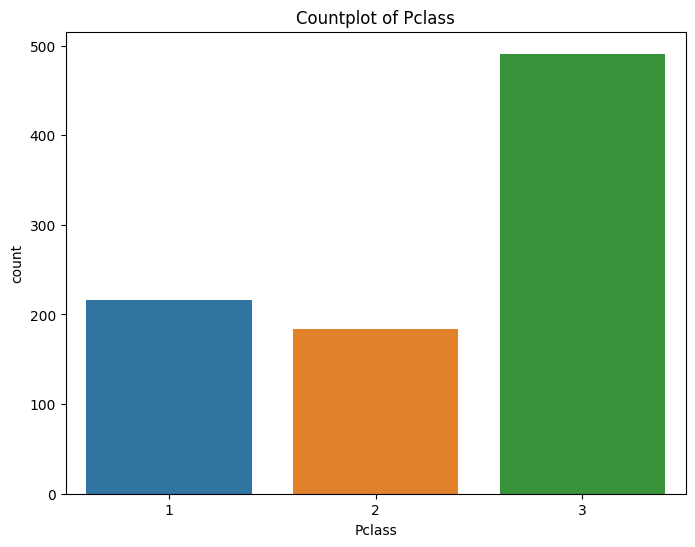

Value counts for column 'SibSp':
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64



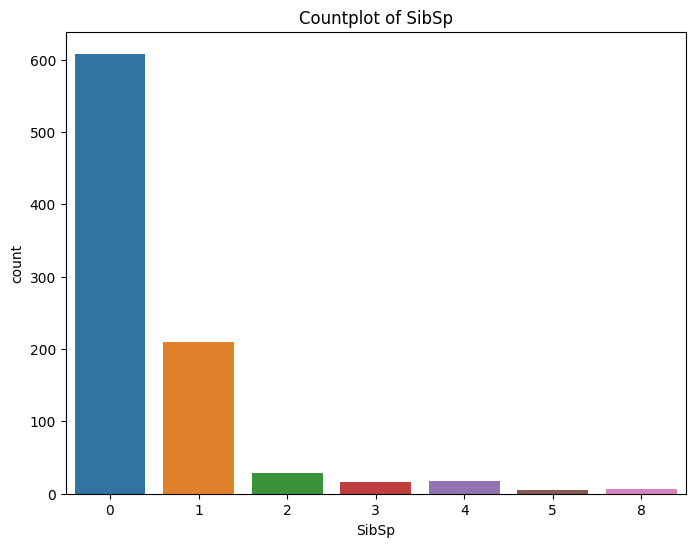

Value counts for column 'Parch':
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64



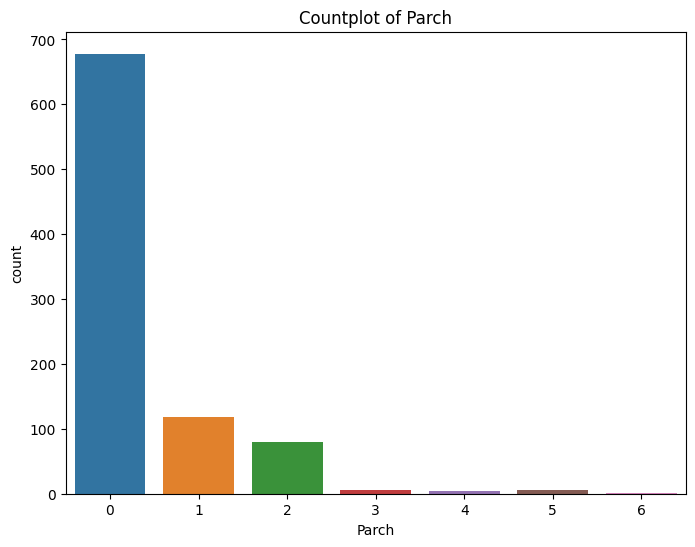

Value counts for column 'Sex':
male      577
female    314
Name: Sex, dtype: int64



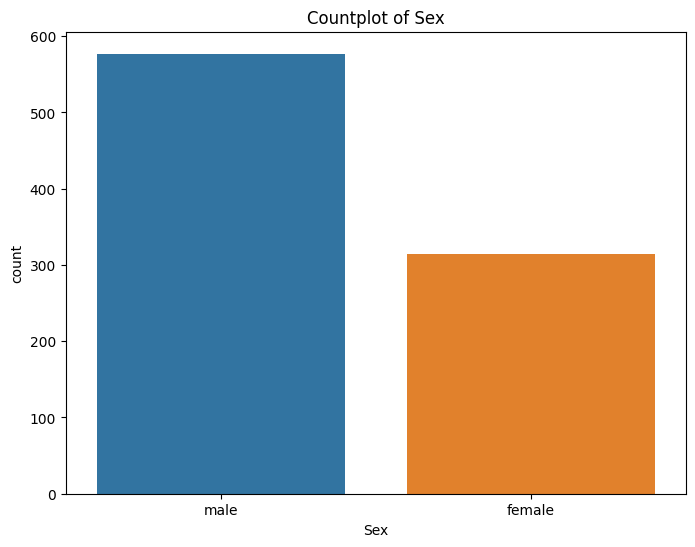

Value counts for column 'Embarked':
S    646
C    168
Q     77
Name: Embarked, dtype: int64



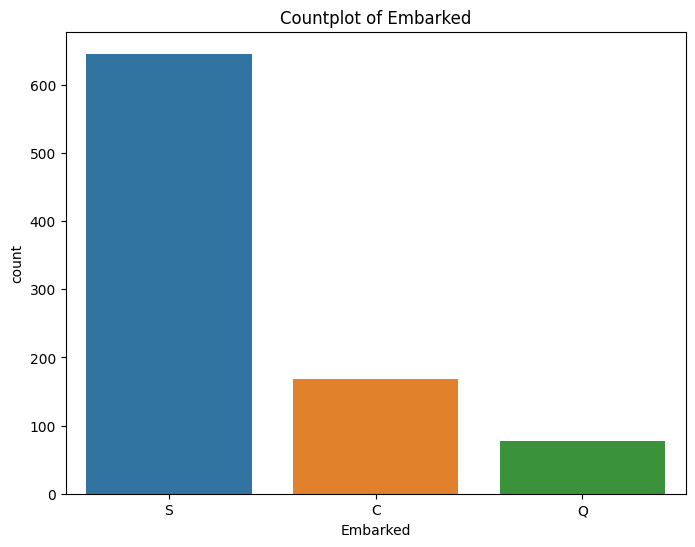

In [47]:
for col in cat_columns:
  # Value counts
  value_counts = records[col].value_counts()
  print(f"Value counts for column '{col}':\n{value_counts}\n")

  # Boxplot
  plt.figure(figsize=(8, 6))
  sns.countplot(data=records, x=records[col])
  plt.title(f'Countplot of {col}')
  plt.show()

In [ ]:
#for example, generate dendrograms to show hierarchical clustering
sns.clustermap(records.corr(), square=True, cmap='Blues', annot=True, row_cluster=False)

## **2.5 Convert categorical data to numeric**


In [ ]:
cat_columns=['Sex','Embarked']
#Convert categorical variables to numerical using get dummies
records=pd.get_dummies(records, columns=cat_columns, drop_first=True)

print(records.info())

## **2.6 Select Features and Target**
Select predictors (attributes) for Classification Set role (Target)

In [50]:
#Select predictors
features=['Age','Sex_male', 'Pclass','Fare', 'SibSp','Parch','Embarked_Q','Embarked_S']
X=records[features]

In [51]:
y=records['Survived']

## **2.7 Split the Dataset**
Split arrays or matrices into random train and test subsets https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)  # 80% training and 20% testing

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape[0])
print('Test dataset size:',X_test.shape[0])

## **2.8 Train a Logistic Regression Model and Make Predictions**

(Model implementation)

1.  Initialise /create an empty object decisiontreeclassifier (model)
2.  Train the model using the training dataset
3.  Make prediction using the model for the test dataset

Train a model using the training dataset
Make prediction using the model for the test dataset

Read about DecisionTreeClassifier at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [53]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=7) #default criterion is gini, max_depth=25

# Write your code to train Decision Tree Classifer with the traning dataset


# Write your code to make predictions for the test dataset



### **Inspect Predictions**

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.sample(20)

## **2.9 Evaluate Model Performance and Optimise Threshold**


(Performance Evaluation)


1. Generate confusion matrix and classification report   
2. Calculate Accuracy, Precision, Recall, F1 separately when needed


Classification metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics


In [ ]:
#Write your code to print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
#Model Evaluation, calculate metrics: Accuracy, Precision, Recall, F1,
print("Accuracy: ", '%.3f' % metrics.accuracy_score(y_test,y_pred))
print("Precision: ",'%.3f' % metrics.precision_score(y_test,y_pred))
print("Recall: ", '%.3f' % metrics.recall_score(y_test,y_pred))
print("F1: ", '%.3f' % metrics.f1_score(y_test,y_pred))

### **Plot ROC (Receiver operating characteristic) curve and confusion matrix**

ROC surve
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html?highlight=plot_roc_curve#sklearn.metrics.plot_roc_curve

Confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix

In [57]:
#get predicted probabilities for the main class
y_pred_probs = clf.predict_proba(X_test)
y_pred_probs = y_pred_probs[:, 1]


In [58]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_pred_probs)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
#Calculate and print AUC
auc = roc_auc_score(y_test, y_pred_probs)
print('AUC:', auc)

### **Optimise the threshold**

In [61]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

In [62]:
# Find best threshold based on the distance between tpr - fpr
optimal_idx = (tpr - fpr).argmax()
best_threshold = thresholds[optimal_idx]

print('Best thredshold', best_threshold)


Best thredshold 0.8


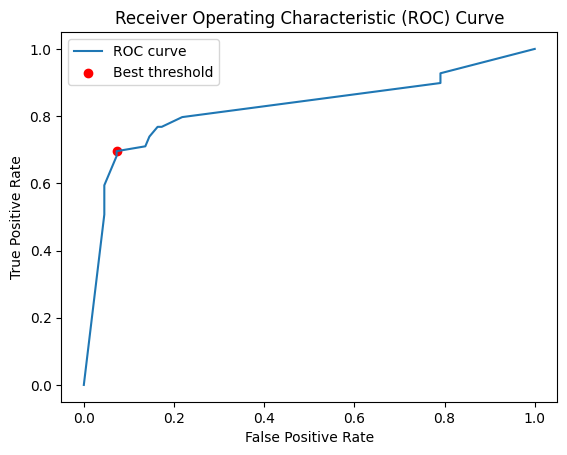

In [63]:
# plot the ROC curve and the best point
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [64]:
# initialize variables to store the best threshold and the highest AUC score
best_threshold = None
highest_ac_score = 0


In [65]:
# iterate over the thresholds and compute the AUC score for each
for threshold in thresholds:
  y_pred_test = (y_pred_probs >= threshold).astype(int)
  ac_score = metrics.accuracy_score(y_test, y_pred_test)
  if ac_score > highest_ac_score:
    highest_ac_score = ac_score
    best_threshold = threshold


In [66]:
# print the best threshold and the highest AUC score on the test data
print('Best threshold:', best_threshold)
print('Highest accuracy score:', highest_ac_score)

Best threshold: 0.8
Highest accuracy score: 0.8379888268156425


In [67]:
# Assign predictions based on the new threshold
y_pred = (y_pred_probs >= best_threshold).astype(int)

In [68]:
#Write code to print confusion matrix and classification report, hint: use confusion_matrix and classification_report functions with the paramaters y_test, y_pred




[[102   8]
 [ 21  48]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       110
           1       0.86      0.70      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



## **2.10 Visualise the trees**

Not all classification machine learning models can be visualised.

In [69]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
#Import libraries and classes
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Biopsy.png')
Image(graph.create_png())

# **Task 3: House Price Estimation**

Dataset: HousingPrice

Source: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

The dataset was modified to allow you deal with missing data.
**Download the modified data at the unit site.**

## **3.1 Import libraries and functions**

In [71]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.parsers.readers import annotations

from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation

#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

## **3.2 Load data**

In [ ]:
# load dataset
records = pd.read_csv('https://raw.githubusercontent.com/VanLan0/MIS710-ML/main/Datasets/Housing3.csv')

#explore the dataset
print(records)

print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1])

## **3.3 Inspect and pre-process data**

In [73]:
#Write your code to examine the data shape, variables and types. Hint: use info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              536 non-null    object
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          539 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  538 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 55.5+ KB


In [74]:
#area is wrongly documented as string
records['area'] = records['area'].apply(pd.to_numeric, errors='coerce')

### **Inspect and treat missing data**

In [75]:
records.isnull().sum().sort_values(ascending=False)

area                10
furnishingstatus     7
mainroad             6
bedrooms             0
bathrooms            0
stories              0
guestroom            0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
price                0
dtype: int64

Note: in Lab 3 we detected spaces in some columns were also missing data

In [76]:
# Replace empty strings (" ") with NaN
records.replace(" ", pd.NA, inplace=True)

In [77]:
#Write your code to print the missing data. Hint: use .isnull().sum().sort_values(ascending=False)


area                10
furnishingstatus     8
mainroad             6
basement             1
airconditioning      1
prefarea             1
bedrooms             0
bathrooms            0
stories              0
guestroom            0
hotwaterheating      0
parking              0
price                0
dtype: int64


In [78]:
#Fill in missing numerical data with mean and categorical data with mode
records['area'].fillna(records['area'].median(),inplace=True)
records['furnishingstatus'].fillna(records['furnishingstatus'].mode()[0], inplace=True) #note, there can be more than one mode

#do it yourself for other missing data
records['mainroad'].fillna(records['mainroad'].mode()[0], inplace=True)
records['basement'].fillna(records['basement'].mode()[0], inplace=True)
records['airconditioning'].fillna(records['airconditioning'].mode()[0], inplace=True)
records['prefarea'].fillna(records['prefarea'].mode()[0], inplace=True)

In [ ]:
print(records.isnull().sum().sort_values(ascending=0))

## **3.4 Conduct Exploratory Data Analysis (EDA)**
1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

Note:
> Numeric variables
*   Summarise data through mean, median (Q2), Q1, Q3, range, Interquartile Range (IQR), outliers, standard deviation, and variance.
*   Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots of continuous variables.

> Categorical variables
*   Summarise data through mode(s), counts and percentages of unique categories.
*   Explore bar charts, pie charts, or frequency tables of categorical variables.

> Explore relationships between two or more variables  
*   Compare two continuous variables using their descriptive statistics (such as means, medians, and Inter Quartile Range (IQR), range) and explore the relationship between them using scatterplots and correlation coefficients.
*   Explore the relationship between two categorical variables using a two-way contingency table (crosstab), clustered bar charts, stacked bar charts or a mosaic plot.
*   Explore the relationship between one numeric and one categorical variable, through using and grouped boxplots, violin plots, and histograms.
*   Explore correlations among multiple (selected) numeric variables using heatmaps of the correlation matrix.


3. Convert data as needed
You can also explore logistic regression relationships between two variables.

### **Univariate analysis**
Explore and visualise each variable at a time


In [ ]:
records.info()

In [81]:
# write code to generate an overview of descriptive stats of numeric data, use describe()



,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5132.917431,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2165.224760,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4510.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [82]:
#you can add other numeric columns to numeric_columns below, but really do stats like means, median, sdt make sense?
numeric_columns=['area', 'bedrooms','price']

In [ ]:
for col in numeric_columns:
  # Value counts
  print(f'Descriptive stats of {col}')
  print(records[col].describe())

  # Boxplot
  plt.figure(figsize=(8, 6))
  sns.kdeplot(data=records, x=records[col])
  plt.title(f'Distribution of {col}')
  plt.show()

You can add kde line on top of the distplot, for example:

<Axes: xlabel='area', ylabel='Count'>

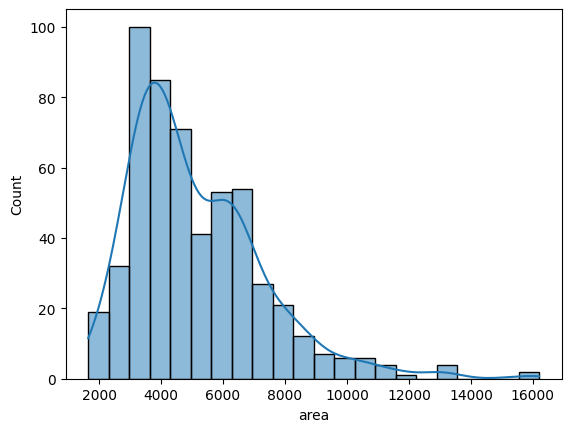

In [84]:
sns.histplot(data=records, x='area', kde=True)

<Axes: xlabel='area'>

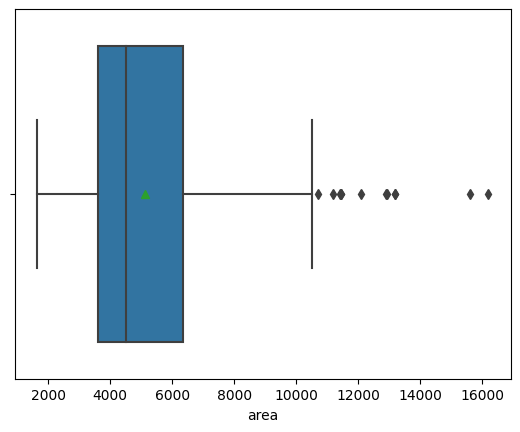

In [85]:
sns.boxplot(data=records, x='area', showmeans=True)

Note the skewed distributions - thus we replaced the missing data with median, not mean. And how we handle missing data and EDA and data encoding can be iterative activities; not linear, one step after another.  

In [86]:
cat_columns=['bedrooms', 'bathrooms', 'stories', 'mainroad', 'basement','hotwaterheating', 'airconditioning', 'parking', 'prefarea','furnishingstatus']

Value counts for column 'bedrooms':
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64



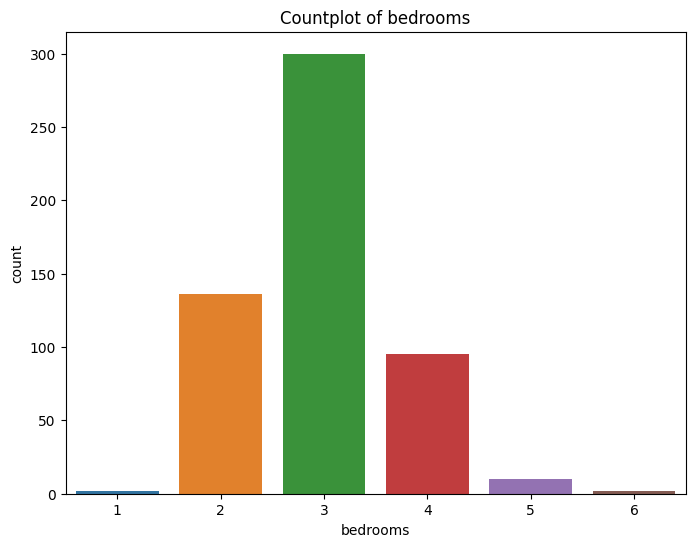

Value counts for column 'bathrooms':
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64



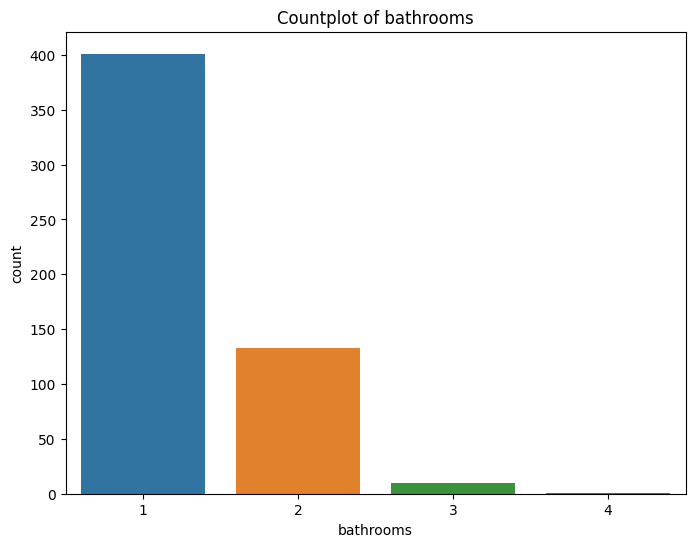

Value counts for column 'stories':
2    238
1    227
4     41
3     39
Name: stories, dtype: int64



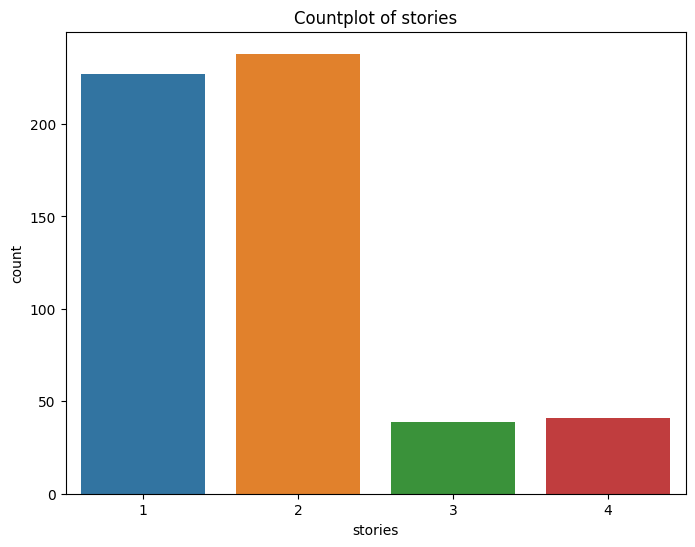

Value counts for column 'mainroad':
yes    470
no      75
Name: mainroad, dtype: int64



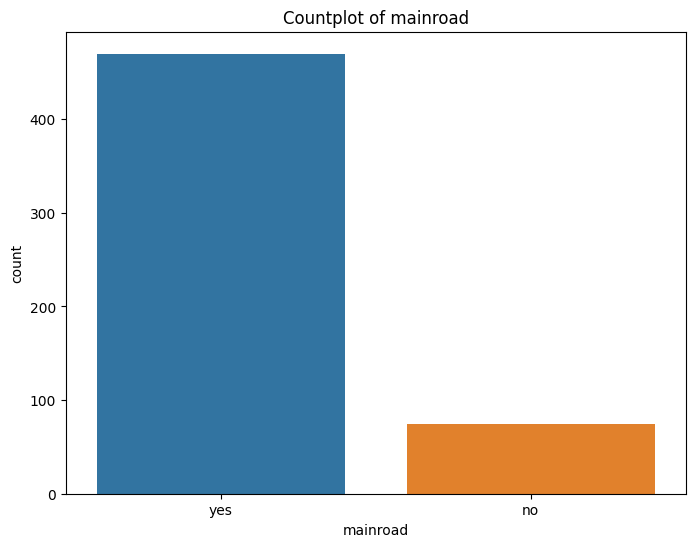

Value counts for column 'basement':
no     355
yes    190
Name: basement, dtype: int64



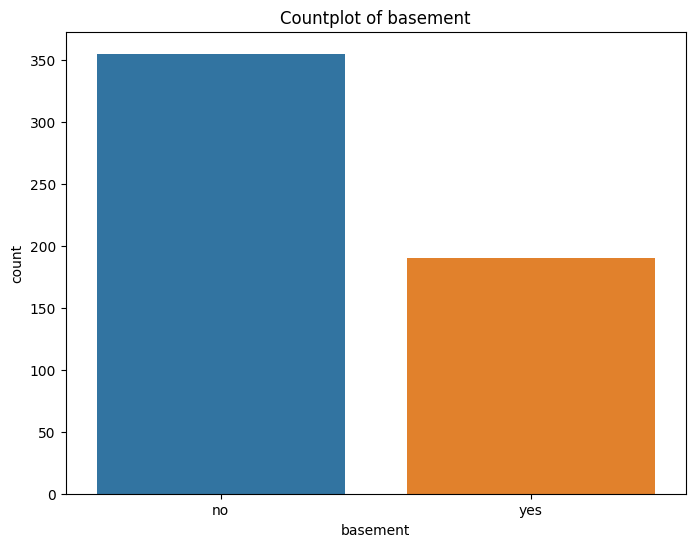

Value counts for column 'hotwaterheating':
no     520
yes     25
Name: hotwaterheating, dtype: int64



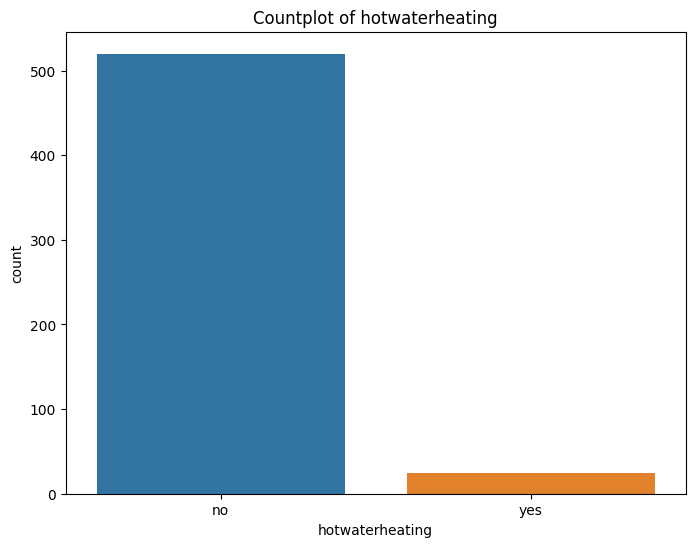

Value counts for column 'airconditioning':
no     373
yes    172
Name: airconditioning, dtype: int64



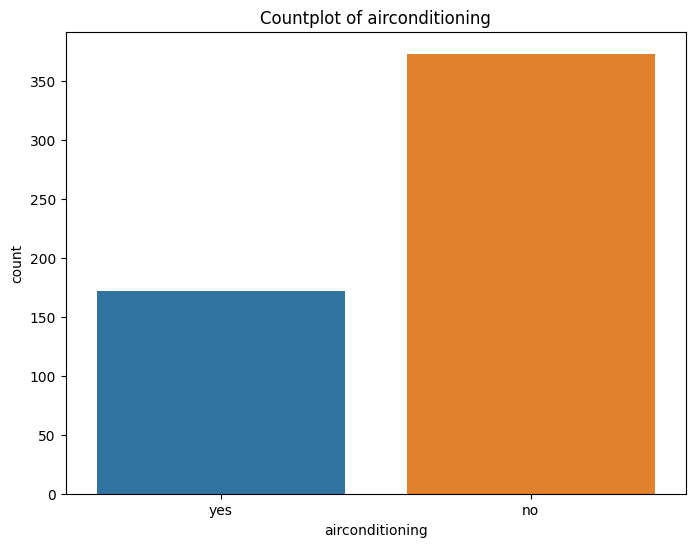

Value counts for column 'parking':
0    299
1    126
2    108
3     12
Name: parking, dtype: int64



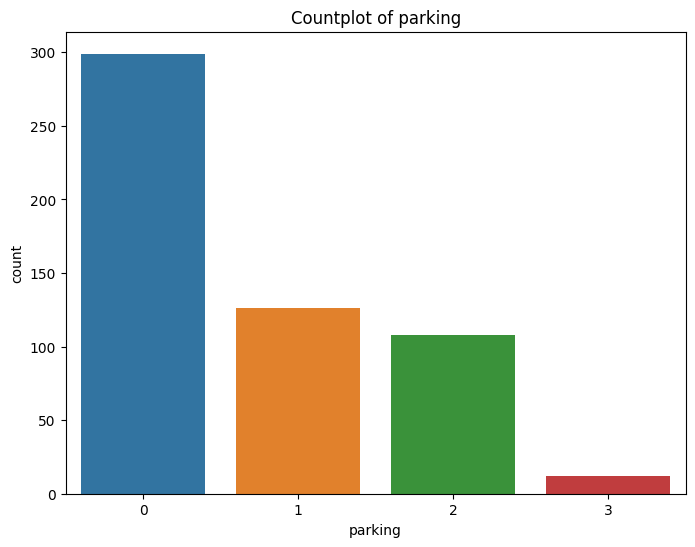

Value counts for column 'prefarea':
no     417
yes    128
Name: prefarea, dtype: int64



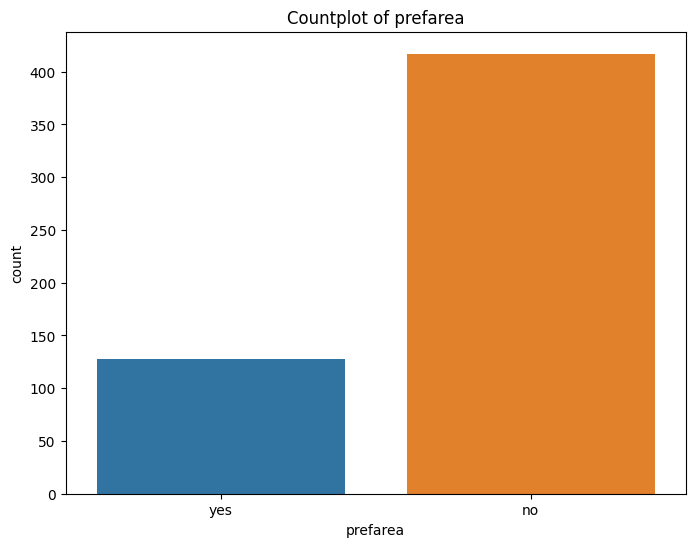

Value counts for column 'furnishingstatus':
semi-furnished    230
unfurnished       176
furnished         139
Name: furnishingstatus, dtype: int64



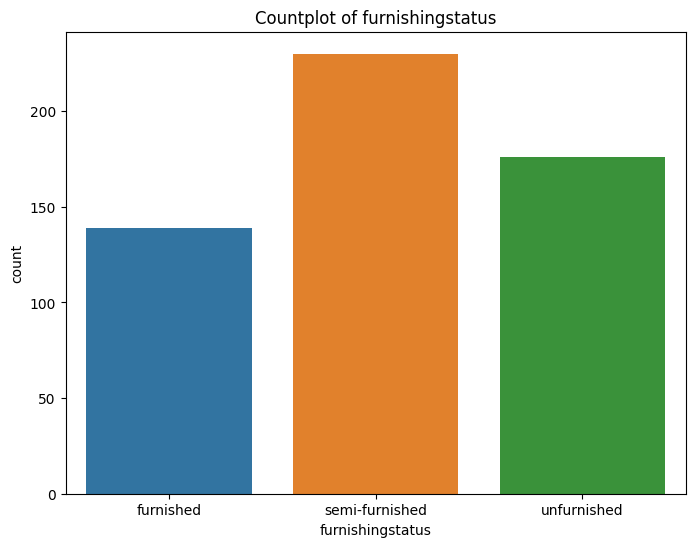

In [87]:
for col in cat_columns:
  # Value counts
  value_counts = records[col].value_counts()
  print(f"Value counts for column '{col}':\n{value_counts}\n")

  # Boxplot
  plt.figure(figsize=(8, 6))
  sns.countplot(data=records, x=records[col])
  plt.title(f'Countplot of {col}')
  plt.show()

In [88]:
#you can also use the built-in function mode; it returns a series, so get the first index, there can be more than one mode
print(records['furnishingstatus'].mode()[0])
print(records['mainroad'].mode()[0])

semi-furnished
yes


In [89]:
#find mode
print('Furnishing Status mode: ', records['furnishingstatus'].mode())

Furnishing Status mode:  0    semi-furnished
Name: furnishingstatus, dtype: object


### **Bivariate and Multivariate visualisation**

**Display a countplot for one categorical variable grouped by a second categorical variable**
https://seaborn.pydata.org/generated/seaborn.countplot.html

<Axes: xlabel='prefarea', ylabel='count'>

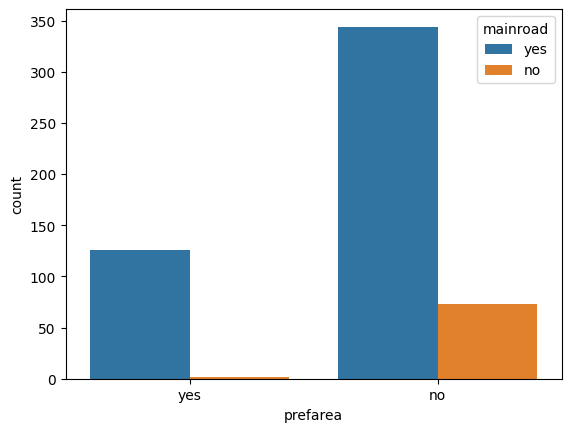

In [91]:
sns.countplot(data=records, x='prefarea', hue='mainroad')

<Axes: xlabel='furnishingstatus', ylabel='count'>

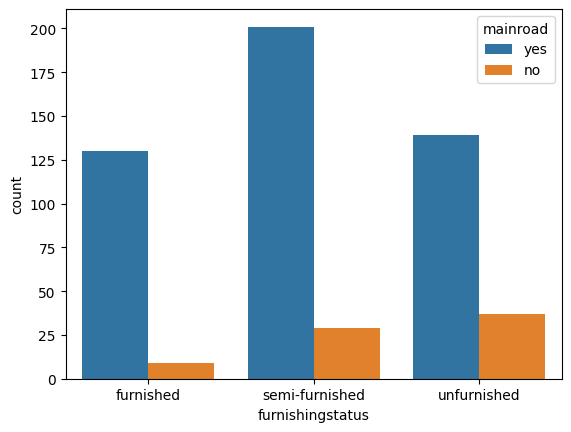

In [92]:
#Do it yourself for other categorical variables
sns.countplot(data=records, x='furnishingstatus', hue='mainroad')

**Compare distributions of numerical variables using boxplots**
https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='price', ylabel='furnishingstatus'>

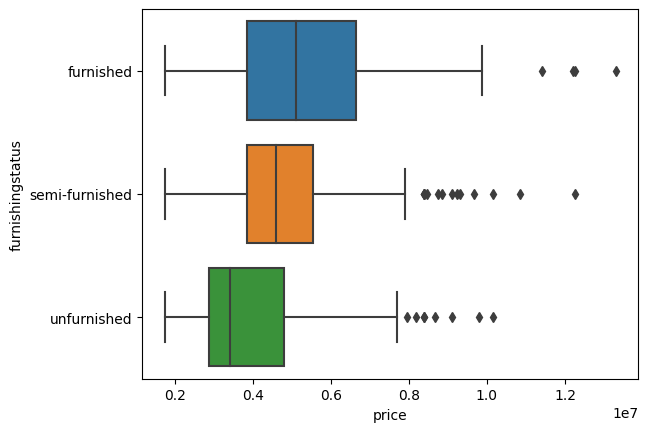

In [93]:
sns.boxplot(data=records, x='price', y='furnishingstatus')

<Axes: xlabel='price', ylabel='prefarea'>

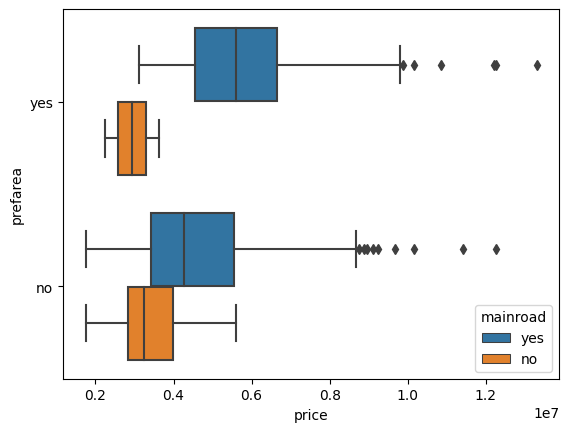

In [94]:
#Do it yourself for other variables, hint: using x=  y= and hue=
sns.boxplot(data=records, x='price', y='prefarea', hue='mainroad')

**Ploting diagram to see relationships between two numerical variables**
https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: xlabel='area', ylabel='price'>

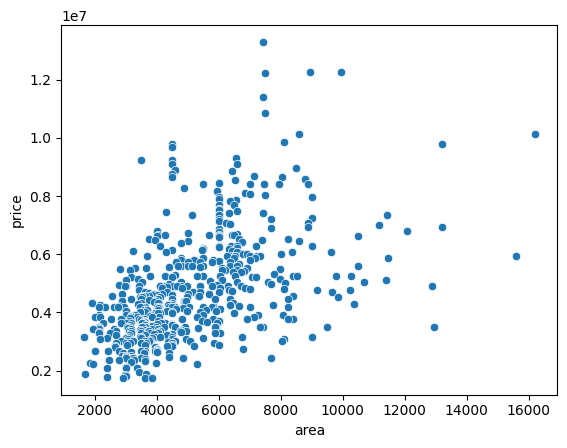

In [95]:
sns.scatterplot(data=records, x='area', y='price')

<ipython-input-96-2faee943acb9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(records.corr(), square=True, cmap='Blues', annot=True)


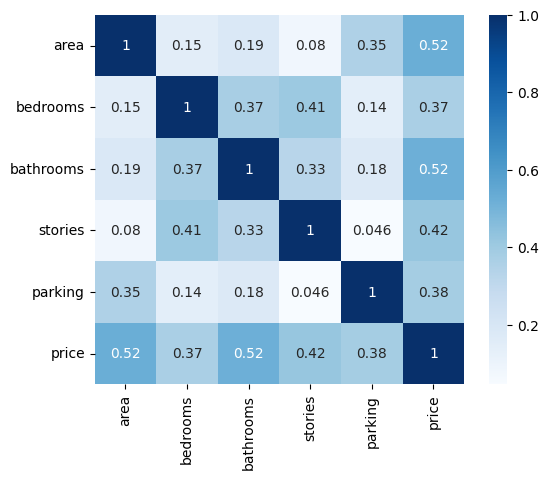

In [96]:
#generate heatmaps to explore relationships
sns.heatmap(records.corr(), square=True, cmap='Blues', annot=True)
plt.show()

<ipython-input-97-eb654c8993b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(records.corr(), square=True, cmap='Blues', annot=True, row_cluster=False)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


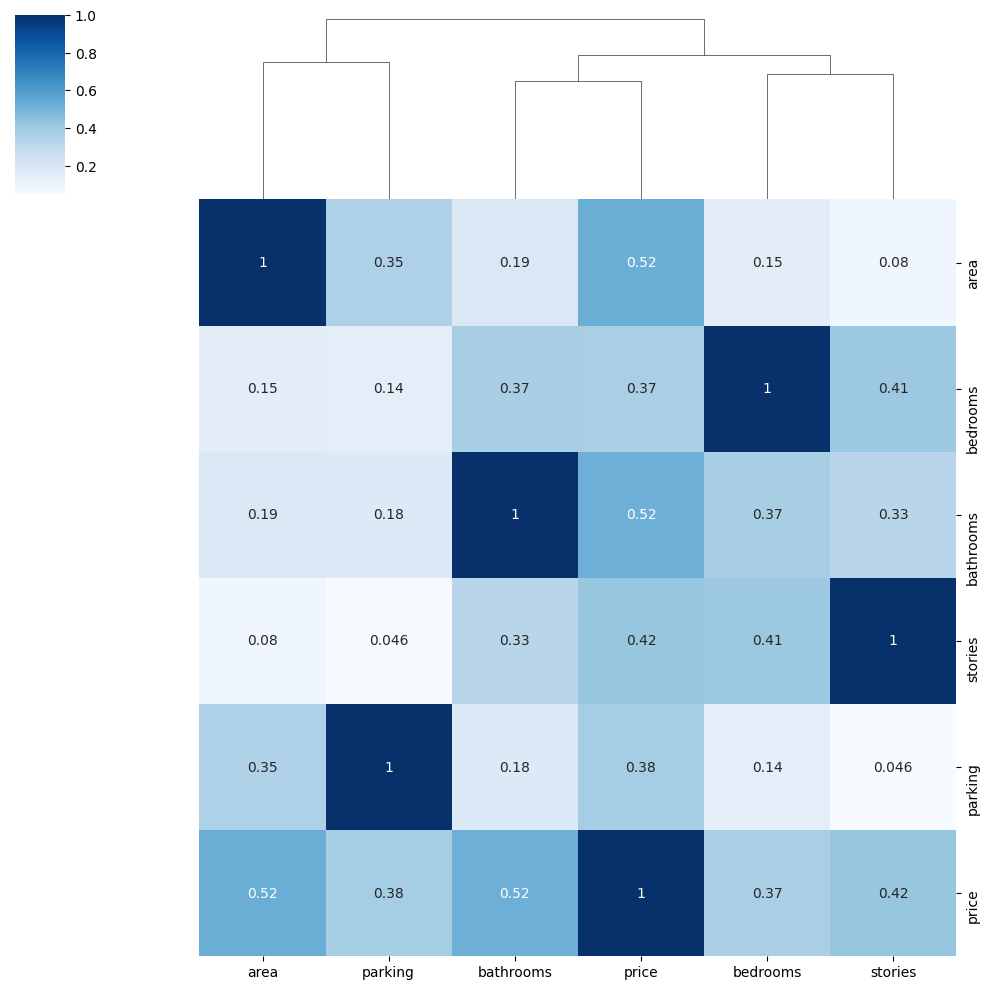

In [97]:
#generate dendrograms to show hierarchical clustering
sns.clustermap(records.corr(), square=True, cmap='Blues', annot=True, row_cluster=False)
plt.show()

## **3.5 Prepare data (Convert data types)**

In [98]:
print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              545 non-null    float64
 1   bedrooms          545 non-null    int64  
 2   bathrooms         545 non-null    int64  
 3   stories           545 non-null    int64  
 4   mainroad          545 non-null    object 
 5   guestroom         545 non-null    object 
 6   basement          545 non-null    object 
 7   hotwaterheating   545 non-null    object 
 8   airconditioning   545 non-null    object 
 9   parking           545 non-null    int64  
 10  prefarea          545 non-null    object 
 11  furnishingstatus  545 non-null    object 
 12  price             545 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB
None


In [99]:
#convert categorical variables to numeric
# Define the custom mapping
furnishing_mapping = {
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
}
# Convert the categories to numerical values using replace()
records['furnishingstatus_N'] = records['furnishingstatus'].replace(furnishing_mapping)

In [100]:
other_cat_variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Convert categorical variables into numeric using dummy encoding
records = pd.get_dummies(records, columns=other_cat_variables, drop_first=True)

In [101]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area                 545 non-null    float64
 1   bedrooms             545 non-null    int64  
 2   bathrooms            545 non-null    int64  
 3   stories              545 non-null    int64  
 4   parking              545 non-null    int64  
 5   furnishingstatus     545 non-null    object 
 6   price                545 non-null    int64  
 7   furnishingstatus_N   545 non-null    int64  
 8   mainroad_yes         545 non-null    uint8  
 9   guestroom_yes        545 non-null    uint8  
 10  basement_yes         545 non-null    uint8  
 11  hotwaterheating_yes  545 non-null    uint8  
 12  airconditioning_yes  545 non-null    uint8  
 13  prefarea_yes         545 non-null    uint8  
dtypes: float64(1), int64(6), object(1), uint8(6)
memory usage: 37.4+ KB


## **3.6 Select Features and Target**
Select predictors (attributes) for Classification Set role (Target)

In [102]:
#Select predictors, e.g. ['area','bedrooms', 'bathrooms','stories', 'parking','mainroad_yes','guestroom_yes','basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_N']
#features=

X=records[features]


In [103]:
#specify the label records['price']

#y=
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

## **3.7 Split the Dataset**
Split arrays or matrices into random train and test subsets https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [ ]:
#from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set 70% and test set 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% testing

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)


## **3.8 Training a Decision Tree Regressor and Make Predictions**
Train a model using the training dataset Make prediction using the model for the test dataset Read about DecisionTreeRegressor at:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

In [105]:
#Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#instantiate a decision tree regressor and fit it with the training data
regressor = DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

regressor

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

In [106]:
#Write code to train the model regressor, i.e. fit it with the training set. Hint: fit(X_train, y_train)



DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

In [107]:
#predict prices
y_pred = regressor.predict(X_test)


In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.0f' % x)
area=X_test['area']

#inspection
inspection=pd.DataFrame({'Area':area, 'Actual':y_test, 'Predicted':y_pred})
inspection.head(20)

## **3.9 Evaluate the model performance**


In [ ]:
#Evaluate the model
from sklearn import metrics
print('Mean Absolute Error:', '%.0f' % metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', '%.0f' % metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', '%.0f' %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
inspection['Actual'].describe()

In [ ]:
inspection['Predicted'].describe()

## **3.10 Visualise the trees**

Not all classification machine learning models can be visualised.

In [112]:
#Import plot_tree to  extract rules and visualise the decition tree model
from sklearn.tree import plot_tree, export_text
from pandas.io.parsers.readers import annotations


In [ ]:
# Convert feature_names to a list if it's an Index object
feature_names = list(features) if isinstance(features, pd.Index) else features

# Extract the decision rules
rules = export_text(regressor, feature_names=feature_names)
print(rules)

**Discuss the Interpretability vs Explainability of the model**

Interpretability relates to understanding how a machine learning model works, i.e., how it makes predictions based on input data.

Explainability focuses on whether the model's decision-making process makes sense from a human perspective.

An explainable model not only provides predictions but also provides human-understandable explanations or justifications for those predictions.

In [ ]:
# visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

**Optional**

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,
filled=True, rounded=True,
special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('HousePricePrediction.png')
Image(graph.create_png())


**Optional:** repeat the steps above on the Petrol_consumption dataset at the unit site.